In [2]:
#get the image
#turn it into a np array
#create a noise image
#add the initial image and the noise image together to create gaussian noise image
#use DCT to denoise the image
#calculate the PSNR using the difference of the old and new image

#fourier transform
#DCT transform


In [3]:
import numpy as np
import cv2
from scipy.fftpack import dctn,idctn
from PIL import Image
import math
import matplotlib.pyplot as plt
import io


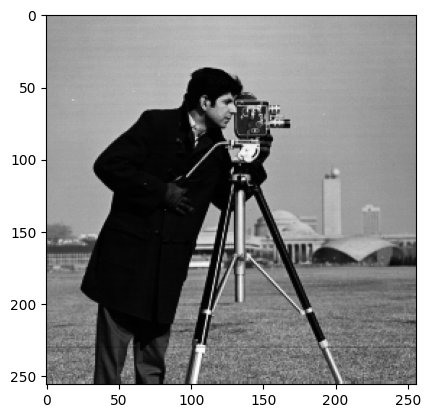

In [40]:
clean_img =  Image.open('cameraman.tif')
clean_image_np = np.array(clean_img)/255
n_p = 256
u = 100

#patch = clean_image_np[u:u+n_p,u:u+n_p]
patch = clean_image_np
plt.imshow(clean_image_np,cmap='gray')




In [5]:
#plt.imshow(patch,cmap='grey')

(256, 256)


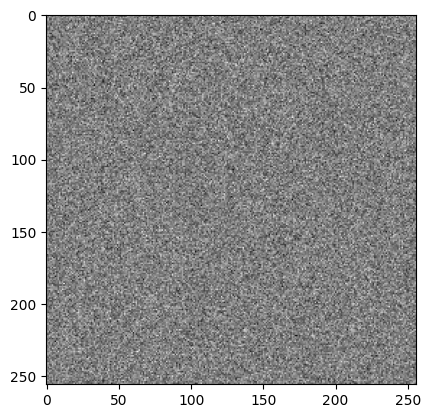

In [33]:
dimensions = patch.shape
x,y = dimensions
print(dimensions)
mean = 0
var = 5
#sigma = np.sqrt(var) #value of sigma!!
sigma = 0.2
n = np.random.normal(mean,sigma, dimensions)

plt.imshow(n, cmap = "grey")

PSNR =  14.035468153233005


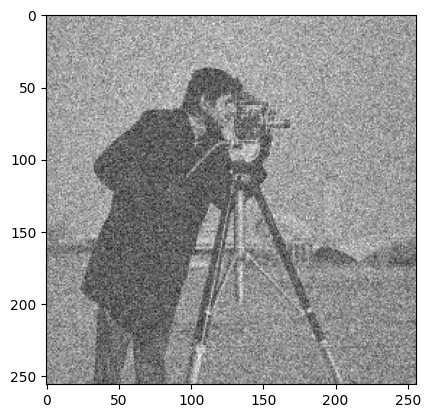

In [34]:

noise_img = patch + n

plt.imshow(noise_img, cmap = "grey")

print('PSNR = ', 10*np.log10(256**2/np.linalg.norm(noise_img-patch)**2))

In [35]:
def compute_dct_patch(patch):
    patch_normalized = 2*(patch-0.5)
    dct_coefficients = dctn(patch_normalized, norm='ortho')
    return dct_coefficients

def compute_idct(dct_coefficients):
    patch = idctn(dct_coefficients, norm='ortho')/2+0.5
    return patch
# Function to perform thresholding
#def thresholding(x, threshold):
 #   return np.where(np.abs(x) < threshold, x, 0)
    
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / math.sqrt(mse)) 
    return psnr 

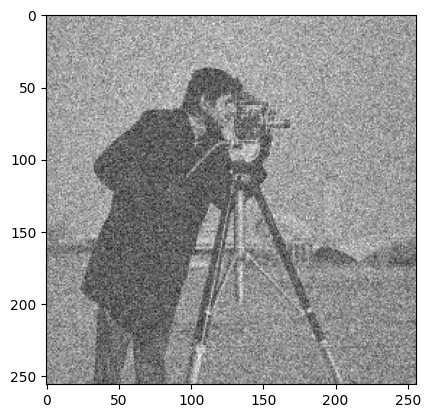

In [36]:
img_dct = compute_dct_patch(noise_img)
# Perform 2D IDCT on the thresholded DCT image
img_denoised = compute_idct(img_dct)

plt.imshow(img_denoised, cmap = "grey")

PSNR =  19.68451249045663
PSNR =  19.912151781064136
PSNR =  20.130862103981283
PSNR =  20.241918172326088
PSNR =  20.117522240221778
PSNR =  19.335802509916014
PSNR =  17.799837651764456
PSNR =  16.029402140080958
PSNR =  14.74529670115108


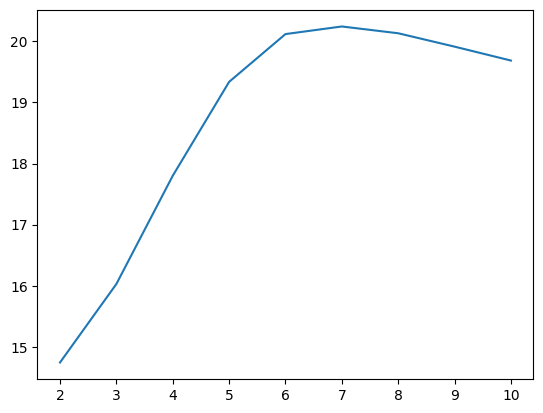

In [39]:
# Set Threshold
#T_vec = np.array([0,0.1,1.5])
#T_vec = np.array([sigma*(3),sigma*(1/2),sigma*(1/3)])
index_vec = np.array([10,9,8,7,6,5,4,3,2])
psnr_all = []
for i in index_vec:
    T = sigma*i
    dct_result = compute_dct_patch(noise_img)
    dct_result_quantized = dct_result
    dct_result_quantized[np.where(np.abs(dct_result)<T)] = 0
    patch_hat = compute_idct(dct_result_quantized)
    psnr =  10*np.log10(256**2/np.linalg.norm(patch-patch_hat)**2)
    print('PSNR = ',psnr)
    psnr_all.append(psnr)
    #plt.imshow(patch_hat,cmap='gray')
    #plt.show()
plt.plot(index_vec,psnr_all)

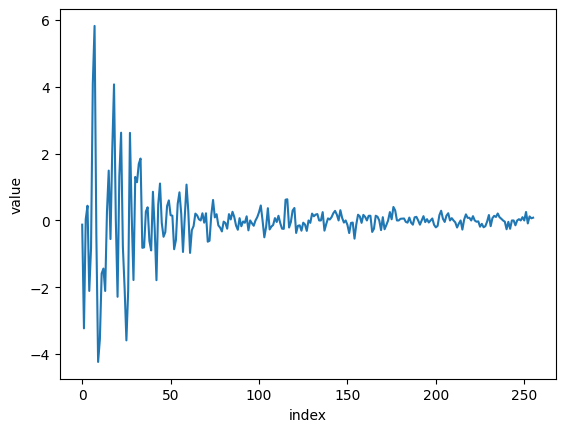

In [11]:
# Example usage
plt.plot((dct_result[10,:]))
plt.xlabel('index')
plt.ylabel('value')
plt.show()

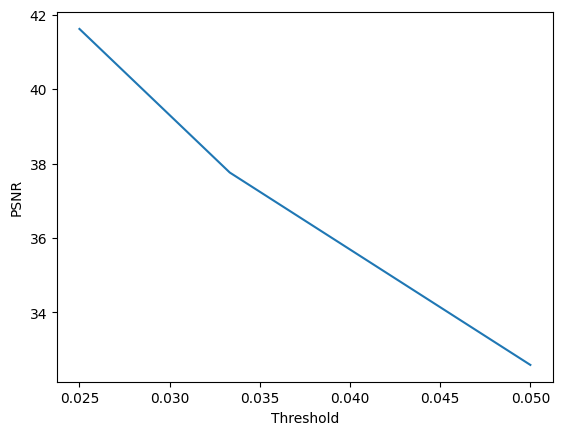

In [148]:
plt.figure()
#T_vec = np.array([sigma(1/4),sigma(1/3),sigma(1/2)])
sigma = 0.1
PSNR_graph = [32.590800928306656,37.76172756762126,41.621120817864764]
plt.plot([sigma*(1/2),sigma*(1/3),sigma*(1/4)], PSNR_graph)
plt.xlabel('Threshold')
plt.ylabel('PSNR')
plt.show()

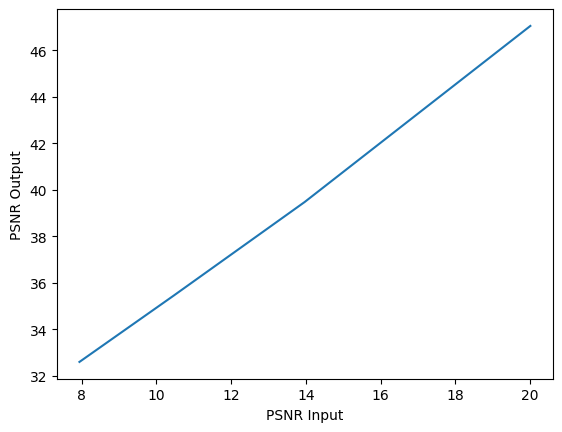

slope: 1.19814538312591


In [159]:
plt.figure()
#same value multiplied to sigma for threshold
#threshold = sigma * 0.5
# sigma: 0.1, 0.075, 0.05, 0.025
psnr_input = [7.941120431682086,10.474541990230923,13.966272915627345,20.003073991196555 ]
psnr_output = [32.590800928306656,35.45740058845057,39.469676308738045,47.04277489711805]
slope = (psnr_output[3]-psnr_output[0])/(psnr_input[3]-psnr_input[0])
plt.plot(psnr_input, psnr_output)
plt.xlabel('PSNR Input')
plt.ylabel('PSNR Output')
plt.show()
print("slope:", slope)

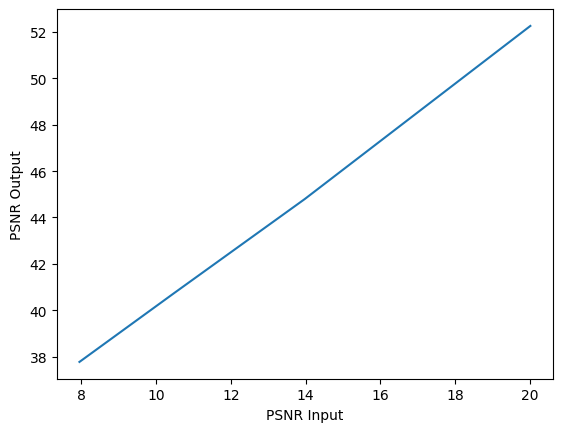

slope: 1.2021521789763843


In [252]:
plt.figure()
#same value multiplied to sigma for threshold
#threshold = sigma * (1/3)
# sigma: 0.1, 0.075, 0.05, 0.025
psnr_input = [7.950241172946858,10.458406287463184,13.975796792045351,20.007671693285367]
psnr_output = [37.769371362572045,40.71090849981837,44.79698529422221,52.26423773545334]
slope = (psnr_output[3]-psnr_output[0])/(psnr_input[3]-psnr_input[0])
plt.plot(psnr_input, psnr_output)
plt.xlabel('PSNR Input')
plt.ylabel('PSNR Output')
plt.show()
print("slope:", slope)

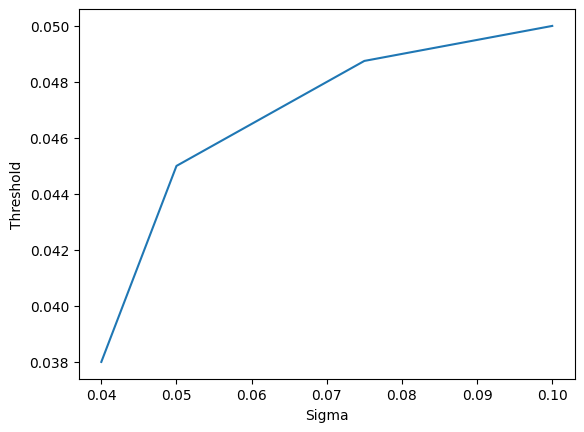

In [254]:
plt.figure()
#same output psnr
#psnr ~32
sigma_values = [0.1,0.075,0.05,0.04]
threshold_values = [(0.1*0.50),(0.075*0.65),(0.05*0.9),(0.04*0.95)]
plt.plot(sigma_values, threshold_values)
plt.xlabel('Sigma')
plt.ylabel('Threshold')
plt.show()

In [ ]:
notes: 
